In [1]:
import pandas as pd, numpy as np
import seaborn as sns
from matplotlib import ticker
import matplotlib.pyplot as plt
import os, glob
from collections import Counter
%matplotlib inline

In [2]:
cd ~/dev/projetMemoire/

/Users/Theo/dev/projetMemoire


In [3]:
db = pd.read_csv("mortsduRif.tsv", sep= "\t", engine='python')
db.rename(columns = {'Unnamed: 0':'ID', 'deces_jour_mois_annee':'deces_annee_mois_jour'},inplace=True)

In [12]:
db.columns

Index(['ID', 'id_conflit_intitule', 'id_sous_conflit_intitule',
       'id_famille_cote_intitule', 'sous_serie', 'serie', 'article', 'nom',
       'prenom', 'nom_autre', 'naissance_jour_mois_annee',
       'id_naissance_lieu_intitule', 'id_naissance_departement_intitule',
       'id_naissance_pays_intitule', 'id_statut_intitule',
       'id_mention_intitule', 'classe', 'recrutement_matricule',
       'id_recrutement_bureau_intitule', 'id_grade_intitule',
       'id_unite_intitule', 'id_bataillon_intitule', 'detail_unite',
       'id_profession_intitule', 'clean dates', 'deces_annee_mois_jour',
       'id_deces_lieu_intitule', 'id_deces_departement_intitule',
       'id_deces_pays_intitule', 'id_operation_intitule',
       'id_transcription_etablissement_lieu_intitule',
       'id_transcription_etablissement_departement_intitule',
       'id_transcription_etablissement_pays_intitule', 'sources',
       'deportation', 'decoration_posthume', 'rehabilitation',
       'lien_ark_fiche', 'cor

In [4]:
pd.to_datetime(db['deces_annee_mois_jour'], errors='coerce', yearfirst=True, format= '%Y/%m/%d')

0      1925-10-08
1      1925-07-03
2      1926-03-26
3      1925-07-11
4      1925-09-11
          ...    
4717   1925-06-04
4718   1925-11-08
4719   1926-06-02
4720   1926-07-14
4721   1925-08-17
Name: deces_annee_mois_jour, Length: 4722, dtype: datetime64[ns]

In [35]:
first20days = db['deces_annee_mois_jour'].value_counts()[0:20]
next20days = db['deces_annee_mois_jour'].value_counts()[21:41]

In [9]:
first20days

1926-07-14    135
1925-05-25    131
1925-07-04     84
1925-07-11     69
1925-07-18     65
1925-05-13     64
1925-06-04     63
1926-07-18     62
1925-08-26     61
1925-06-15     60
1925-08-25     57
1925-07-24     50
1925-09-30     45
1925-07-03     44
1925-09-06     42
1925-09-10     42
1925-05-21     41
1925-07-19     41
1925-07-12     41
1925-06-05     40
Name: deces_annee_mois_jour, dtype: int64

/Users/Theo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


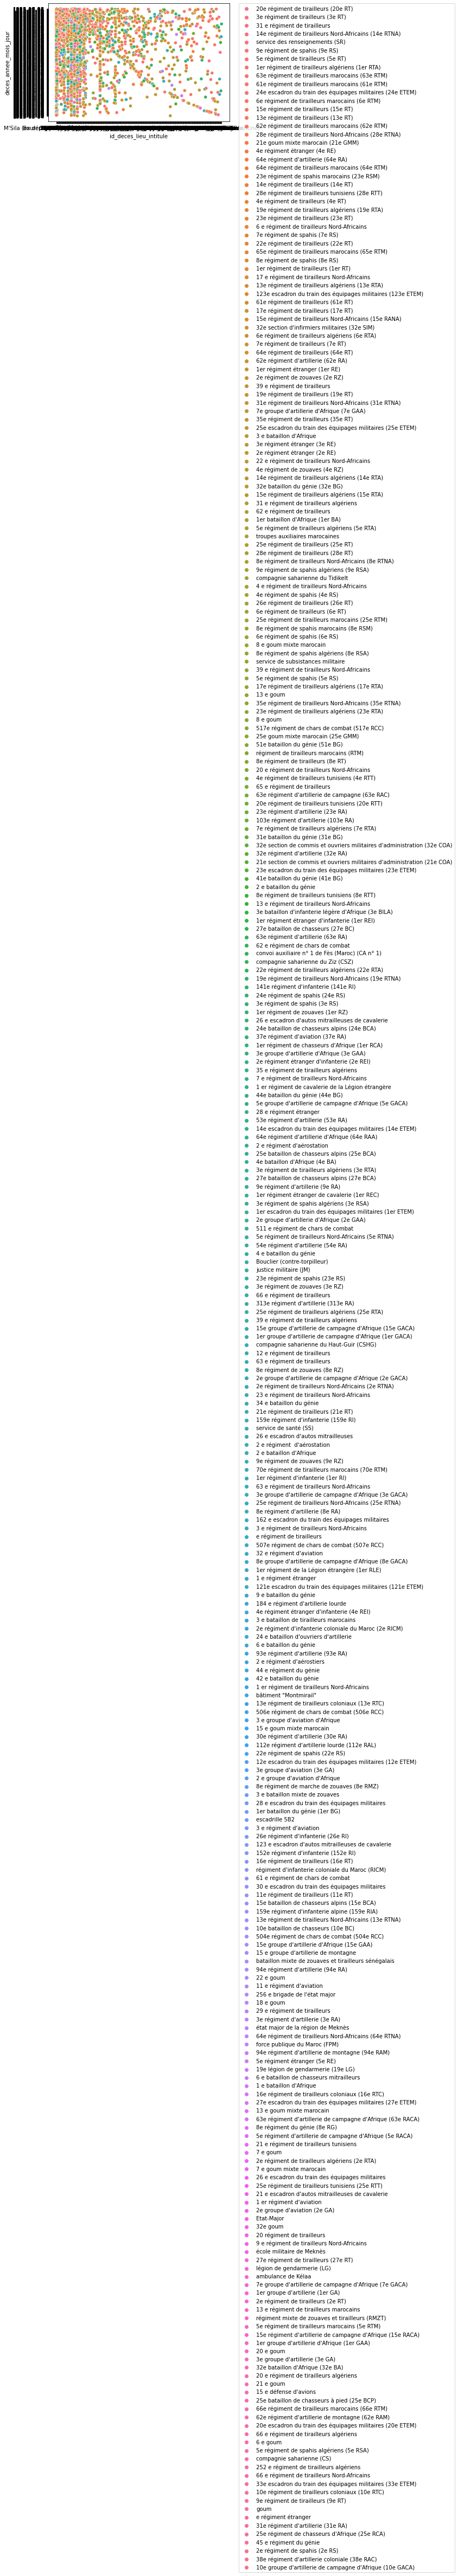

In [28]:
sns.scatterplot(db['id_deces_lieu_intitule'],db['deces_annee_mois_jour'],hue=db['id_unite_intitule'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [30]:
db.groupby('id_unite_intitule').describe()

MultiIndex([(            'ID', 'count'),
            (            'ID',  'mean'),
            (            'ID',   'std'),
            (            'ID',   'min'),
            (            'ID',   '25%'),
            (            'ID',   '50%'),
            (            'ID',   '75%'),
            (            'ID',   'max'),
            (    'sous_serie', 'count'),
            (    'sous_serie',  'mean'),
            ...
            ('rehabilitation',   '75%'),
            ('rehabilitation',   'max'),
            ('corps_retrouve', 'count'),
            ('corps_retrouve',  'mean'),
            ('corps_retrouve',   'std'),
            ('corps_retrouve',   'min'),
            ('corps_retrouve',   '25%'),
            ('corps_retrouve',   '50%'),
            ('corps_retrouve',   '75%'),
            ('corps_retrouve',   'max')],
           length=112)

In [33]:
cd manipFinal

/Users/Theo/dev/projetMemoire/manipFinal


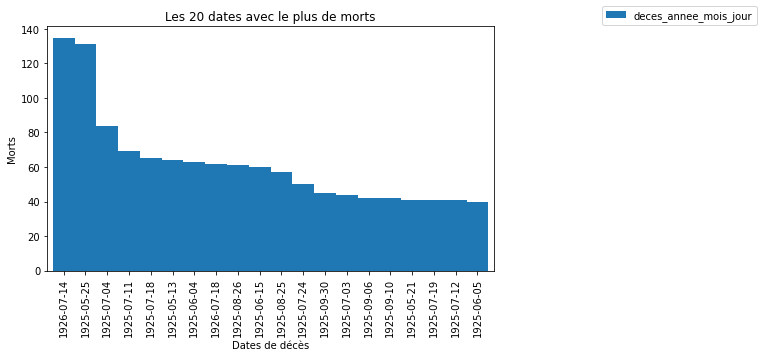

In [38]:
fig = first20days.plot(kind='bar', width = 1)
plt.legend(bbox_to_anchor=(1.6, 1.1), loc='upper right')
fig.set_ylabel('Morts')
fig.set_xlabel('Dates de décès')
fig.set_title('Les 20 dates avec le plus de morts')
plt.rcParams["figure.figsize"] = [8.00, 4.50]

plt.savefig('20dates.jpg', dpi = 300, bbox_inches='tight', pad_inches=0.5, 
            facecolor='auto', edgecolor='white', orientation = 'landscape')

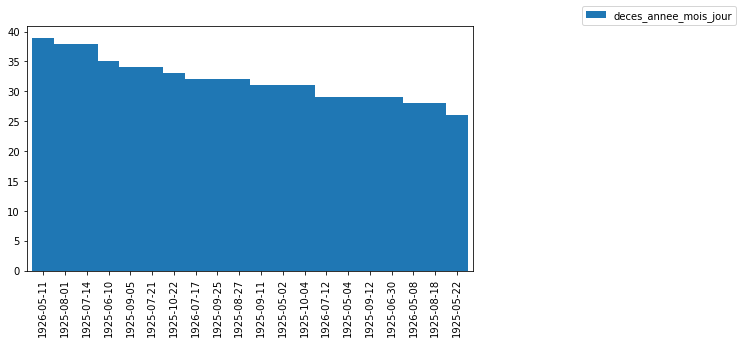

In [39]:
fig2 = next20days.plot(kind='bar', width = 1)
plt.legend(bbox_to_anchor=(1.6, 1.1), loc='upper right')
fig.set_ylabel('Morts')
fig.set_xlabel('Dates de décès')
fig.set_title('Les 20 à 40 dates avec le plus de morts')
plt.rcParams["figure.figsize"] = [8.00, 4.50]

plt.savefig('next20dates.jpg', dpi = 300, bbox_inches='tight', pad_inches=0.5, 
            facecolor='auto', edgecolor='white', orientation = 'landscape')